# Mutual Info Score

In [31]:
import pandas as pd
import numpy as np

In [32]:
data = pd.read_csv("../Datasets/breast_cancer.csv", header=None)
data.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breaast-quad', 'irradiat', 'class']
data.dropna(axis=0, inplace=True)


In [33]:
y = data['class']
X = data.drop('class', axis=1)
#X = data.iloc[:,:9]

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))

In [36]:
encoder.fit(X)
X = encoder.transform(X)

We want to compute $MIC$. In the case where $X$ is categorical and $Y$ is numerical, is:
$$ MIC(X,Y) = \int \int p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) dx dy $$

When both $X$ and $Y$ are categorichal, with $X$ having $k$ classess and $Y$ having $h$ classess it is:

\begin{align} 
MIC(X,Y) &= \sum_{y \in Y} \sum_{x \in X} p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) \\
& = p(x = x_1,y = y_1) \log(\frac{p(x=x_1,y=y_1)}{p(x=x_1)p(y=y_1)}) + \cdots + p(x = x_k,y = y_1) \log(\frac{p(x=x_k,y=y_1)}{p(x=x_k)p(y=y_1)}) \ + \\
& \vdots \\
& + p(x = x_1,y = y_h) \log(\frac{p(x=x_1,y=y_h)}{p(x=x_1)p(y=y_h)}) + \cdots + p(x = x_k,y = y_h) \log(\frac{p(x=x_k,y=y_h)}{p(x=x_k)p(y=y_h)}) = \\
\end{align}

and: $$p(x = x_i , y = y_j) = p(x = x_i | y = y_j) p(y = y_j)  = \frac{\#x_i}{|y_j|}  \frac{\#y_j}{|Y|}$$.
So:
$$ MIC(X,Y) = \sum_{y \in Y} \sum_{x \in X} p(x|y)p(y) \log(\frac{p(x|y)p(y)}{p(x)p(y)}) $$

In [37]:
def MIC(x,y):
    
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):

            joint = (np.count_nonzero((y == i) & (x == j)) / x_count[j]) * x_count[j]/len(x)
            if joint == 0:
                continue
            else:
                mic += joint * np.log(joint/(x_count[j]/len(x)*y_count[i]/len(y)))
    return mic
    

    

In [38]:
def MIC_specular(x,y):
    
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):

            joint = (np.count_nonzero((y == i) & (x == j)) / y_count[i]) * y_count[i]/len(y)
            if joint == 0:
                continue
            else:
                mic += joint * np.log(joint/(x_count[j]/len(x)*y_count[i]/len(y)))
    return mic

In [39]:
for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', MIC(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226554
MIC between 2 covriate and target:  0.04259861458170641
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.06136629232725527
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.0240547232042084


In [40]:
for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', MIC_specular(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226513
MIC between 2 covriate and target:  0.0425986145817064
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.0613662923272552
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.024054723204208386


In [41]:
from sklearn.metrics import mutual_info_score

for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', mutual_info_score(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.014368125191819573
MIC between 1 covriate and target:  0.008006352932227068
MIC between 2 covriate and target:  0.04259861458170642
MIC between 3 covriate and target:  0.05712993478195197
MIC between 4 covriate and target:  0.038734513190465614
MIC between 5 covriate and target:  0.06136629232725545
MIC between 6 covriate and target:  0.0008544651540267068
MIC between 7 covriate and target:  0.005989752805088747
MIC between 8 covriate and target:  0.024054723204209066


# k-Means

In [42]:
import math

In [132]:
class MyKmeans:
    def __init__(self, k):
        self.k = k
        self.z_1 = None
        self.z = None
        self.loss = None
        self.C = None

    def fit(self, X, random_choice=0):
        np.random.seed(random_choice)
        c_idxs = np.random.choice(X.shape[0], size=self.k)
        self.C = np.array(X[c_idxs])
        self.z = np.zeros(X.shape[0])
        self.z_1 = np.ones(X.shape[0])
        
        while not np.array_equal(self.z, self.z_1):
            self.z_1 = self.z
            # assign each point to its neares neighbor
            for i in range(X.shape[0]):
                best_d = math.inf
                nearest_center = None
                for j in range(self.k):
                    d = np.linalg.norm(X[i] - self.C[j,:])
                    #print(d)
                    if d<best_d:
                        best_d = d
                        nearest_center = j
                self.z[i] = nearest_center

            # recompute the centers
            for i in range(self.k):
                idxs = np.where(self.z == i)[0] # index of datapoint in cluster i 
                self.C[i,:] = np.mean(X[idxs,:], axis=0) # update centers

        self.loss = 0
        for i in range(self.k):
            idxs = np.where(self.z == i)[0]
            for j in range(len(idxs)):
                self.loss += np.linalg.norm(X[j] - self.C[i,:])
                    
            

In [133]:
X = np.genfromtxt("../Datasets/s3.txt")
y = np.genfromtxt("../Datasets/s3.txt")

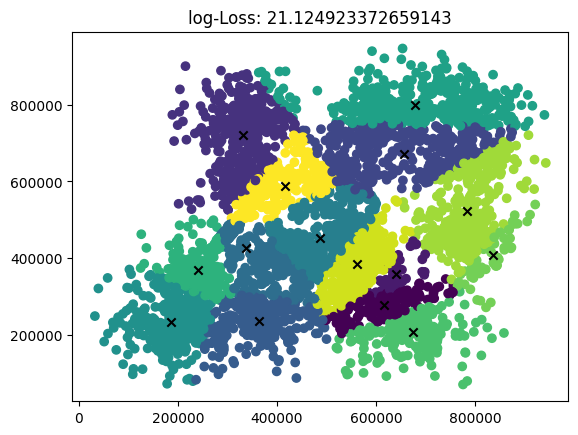

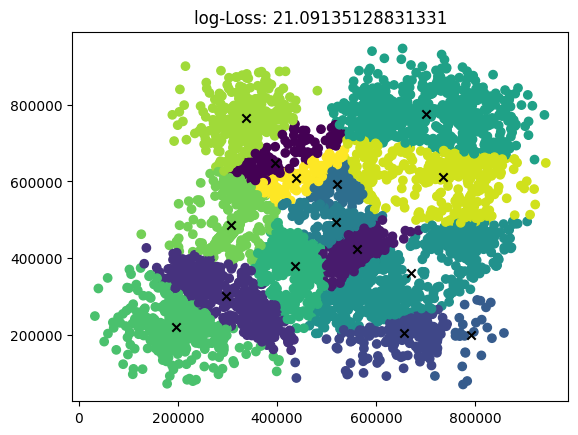

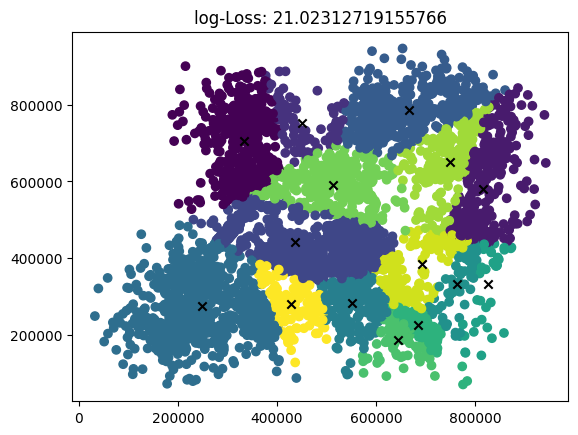

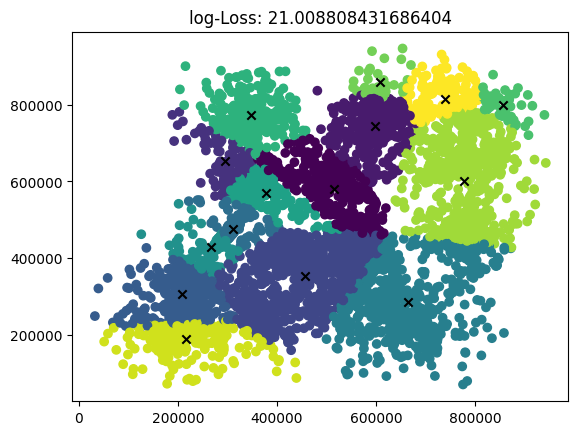

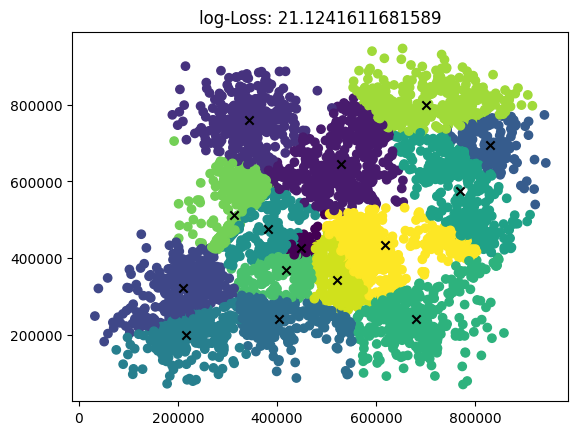

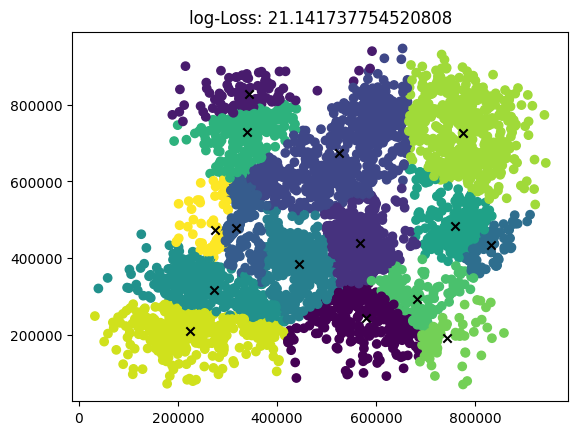

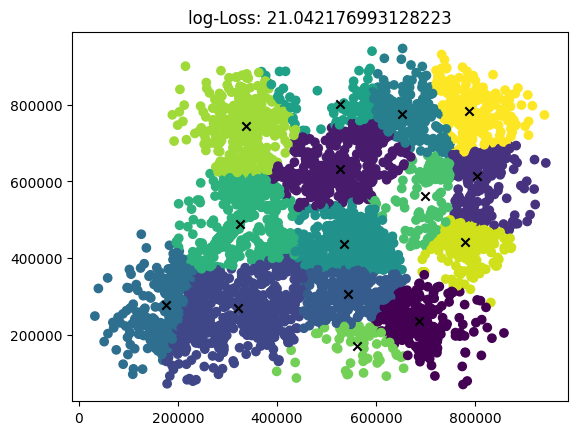

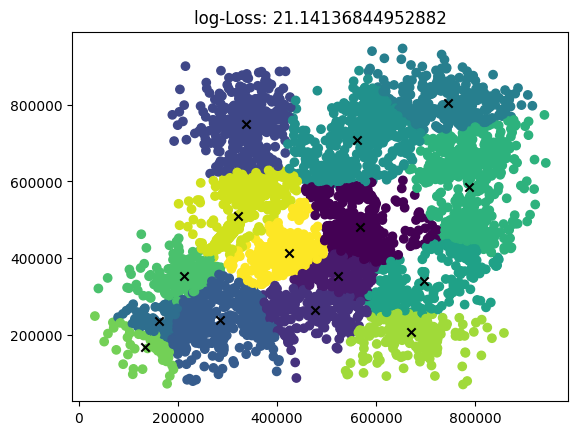

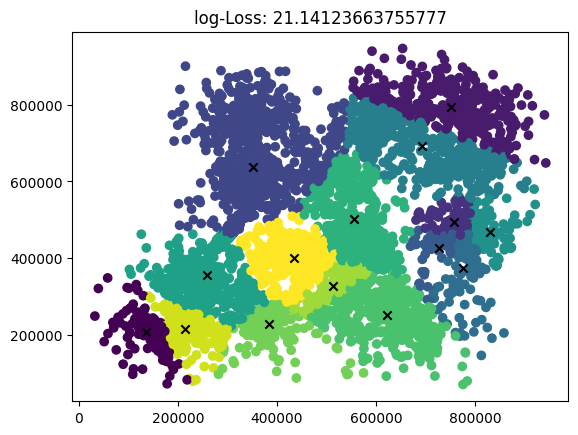

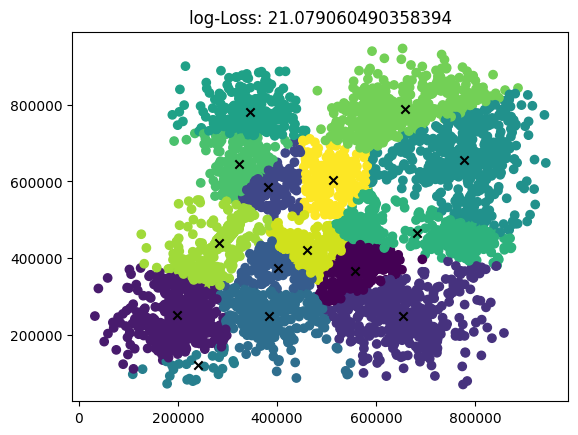

In [138]:
from matplotlib import pyplot as plt
k = MyKmeans(k=15)
for i in range(10):
    k.fit(X, random_choice=i)
    plt.scatter(X[:,0], X[:,1], c = k.z)
    plt.scatter(k.C[:,0], k.C[:,1], marker='x', color='black')
    plt.title(f'log-Loss: {np.log(k.loss)}')
    plt.show()